# **🌾 Introduction**

This project is part of the Innovative AI Challenge 2024 and focuses on addressing Challenge 1: Developing AI Models to Increase Agricultural Productivity. In this notebook, we aim to predict Crop Yield (kg/ha) using features like 🌧️ Rainfall, 🌱 Soil Type, and 🚜 Irrigation Area. The goal is to build a robust regression model that estimates agricultural productivity accurately and submit predictions in the required format.

**🚨 Challenges**

**📉 Small Dataset:** Only 55 samples in both training and test sets, increasing the risk of overfitting.

**🤔 Limited Variability:** Insufficient feature diversity may impact model generalization.

**📊 High Variance Risk:** The model might capture noise rather than meaningful patterns.

**🌟 Objective**
For Part 1, we will build a predictive model to estimate crop yield and ensure high performance despite dataset constraints.

For Part 2, we will address Challenge 2: Creating a Visual AI Chatbot Emulating Human Emotions, which focuses on designing a chatbot for education and elderly support.

**🌟 Goals for Part 1**

🔍 Analyze the dataset to uncover patterns and insights.

📈 Build a predictive model to estimate crop yield using advanced regression techniques.

🚀 Submit predictions that align with the required format and achieve high accuracy on the test dataset.

**Stay tuned for Part 2, where we will dive into detailed visualizations to gain deeper insights! 📊✨**



# **🧠 Data Understanding:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge



In [2]:
train_data=pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/train.csv')
test_data=pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/test.csv')
                

In [3]:
train_data

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,6,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,7,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,8,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,9,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,10,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


In [4]:
test_data

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.70
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.50
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.80
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.90
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.00
5,1006,2014,Punjab,Bajra,384.9,Loamy,1.20
6,1007,2013,Punjab,Bajra,619.7,Loamy,3.81
7,1008,2011,Punjab,Bajra,218.9,Loamy,2.50


In [5]:
print('train_data: ',train_data.shape)
print('test_data: ',test_data.shape)

train_data:  (55, 8)
test_data:  (8, 7)


In [6]:
print('train_data: ',train_data.columns)
print('test_data: ',test_data.columns)

train_data:  Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')
test_data:  Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area'],
      dtype='object')


In [7]:
train_data.describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.00000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,2009.527273,473.881818,2082.207273,3079.418182
std,16.02082,6.394021,106.836760,1495.190498,1706.608372
min,1.00000,2000.000000,218.900000,1.200000,0.000000
25%,14.50000,2004.000000,391.900000,5.500000,985.500000
50%,28.00000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.50000,2015.000000,561.400000,3393.250000,4305.500000
max,55.00000,2021.000000,662.800000,3515.200000,5188.000000


**🔍 Explore Columns and Data Types**

- Column description:

🆔 id: A unique identifier for each data point.

📅 Year: The year when the data was collected (e.g., 2020, 2002).

🗺️ State: The state or region where the data was recorded (e.g., Punjab, Maharashtra).

🌾 Crop_Type: The type of crop grown (e.g., Rice, Wheat, Bajra).

🌧️ Rainfall: The average annual rainfall in the region (measured in mm).

🌱 Soil_Type: The type of soil in the region (e.g., Loamy, Sandy, Clay).

🚜 Irrigation_Area: The area of irrigated land in thousand hectares.

📈 Crop_Yield (kg/ha): The target variable representing the crop yield in kilograms per hectare (numeric value).

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [9]:
train_data.drop(columns=['id'],inplace=True)

In [10]:
train_data

,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


**🚨 Missing Values and Duplicate Values**

In [11]:
train_data.isnull().sum()

Year                  0
State                 0
Crop_Type             0
Rainfall              0
Soil_Type             0
Irrigation_Area       0
Crop_Yield (kg/ha)    0
dtype: int64

**No missing values across any of the columns.
This ensures that the data is clean and ready for exploratory data analysis (EDA) and model building**

In [12]:
train_data.duplicated().sum()

0

**🔢 Numerical and Categorical Columns**

In [13]:
target_col='Crop_Yield (kg/ha)'
num_col=train_data.select_dtypes(include=['number']).columns
cat_col=train_data.select_dtypes(include=['object']).columns
print("Target Columns: ",target_col)
print("\nNumrical Column: ",num_col.tolist())
print("\nCategorical Column: ",cat_col.tolist())

Target Columns:  Crop_Yield (kg/ha)

Numrical Column:  ['Year', 'Rainfall', 'Irrigation_Area', 'Crop_Yield (kg/ha)']

Categorical Column:  ['State', 'Crop_Type', 'Soil_Type']


In [14]:
num_data=train_data.select_dtypes(include=['number'])
cat_data=train_data.select_dtypes(include=['object'])


In [15]:
print('Numerical Data Distribution!')
num_data.describe().round(2).T

Numerical Data Distribution!


,count,mean,std,min,25%,50%,75%,max
Year,55.0,2009.53,6.39,2000.0,2004.0,2009.0,2015.00,2021.0
Rainfall,55.0,473.88,106.84,218.9,391.9,459.5,561.40,662.8
Irrigation_Area,55.0,2082.21,1495.19,1.2,5.5,2721.8,3393.25,3515.2
Crop_Yield (kg/ha),55.0,3079.42,1706.61,0.0,985.5,3943.0,4305.50,5188.0


In [16]:
print("Categorical Data Dsicription!")
cat_data.describe().T

Categorical Data Dsicription!


,count,unique,top,freq
State,55,1,Punjab,55
Crop_Type,55,3,Wheat,19
Soil_Type,55,2,Loamy,37


In [17]:
for c in cat_data:
    col_count=train_data[c].nunique()
    print(f'{c} has {col_count} unique values.')
    print("**"*20)

State has 1 unique values.
****************************************
Crop_Type has 3 unique values.
****************************************
Soil_Type has 2 unique values.
****************************************


In [18]:
for i in cat_col:
    cat_value=train_data[i].value_counts()
    print(f'value count for {i} is :')
    print(cat_value)
    print("-"*20)
    

value count for State is :
State
Punjab    55
Name: count, dtype: int64
--------------------
value count for Crop_Type is :
Crop_Type
Wheat    19
Rice     18
Bajra    18
Name: count, dtype: int64
--------------------
value count for Soil_Type is :
Soil_Type
Loamy       37
alluvial    18
Name: count, dtype: int64
--------------------


# **🛠️ Data Preprocessing**

**Missing Values:** After analyzing the dataset, we found no missing values in any of the columns. ✅
**Duplicate Values:** The dataset was also checked for duplicates, and none were found. ✅

**Since the data is clean, there is no need for further handling of missing or duplicate values. 🎉**



**1️⃣ Feature Encoding 🏷️**


In [19]:
categorical_cols=['State','Crop_Type','Soil_Type']
encoder={}
for feature in categorical_cols:
    
    encoder[feature]=LabelEncoder()
    train_data[feature]=encoder[feature].fit_transform(train_data[feature])
    test_data[feature]=encoder[feature].fit_transform(test_data[feature])
    

In [20]:
train_data

,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,2019,0,2,578.6,0,3515.2,5188
1,2018,0,2,598.3,0,3499.3,5077
2,2017,0,2,493.0,0,3467.7,5046
3,2016,0,2,426.7,0,3474.6,4583
4,2015,0,2,546.9,0,3474.7,4304
5,2014,0,2,384.9,0,3474.7,5017
6,2013,0,2,619.7,0,3488.1,4724
7,2011,0,2,218.9,0,3466.9,4693
8,2010,0,2,472.1,0,3474.8,4307
9,2009,0,2,384.9,0,3474.8,4462


In [21]:
#categorical_cols=['State','Crop_Type','Soil_Type']
#train_data=pd.get_dummies(train_data,columns=categorical_cols,dtype=int)
#test_data=pd.get_dummies(test_data,columns=categorical_cols,dtype=int)


**2️⃣ Feature Scaling 📏**

In [22]:
scaler=StandardScaler()
numerical_cols=['Rainfall','Irrigation_Area']
train_data[numerical_cols]=scaler.fit_transform(train_data[numerical_cols])     
test_data[numerical_cols]=scaler.transform(test_data[numerical_cols])

# **📐 Train-Test Split:**

In [23]:
X=train_data.drop('Crop_Yield (kg/ha)',axis=1)
y=train_data['Crop_Yield (kg/ha)']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **🤖 Model Training with K-Fold Cross-Validation on Multiple Models **

**🌟 Why K-Fold Cross-Validation?**

🔍 Reliable Performance: Ensures robust model evaluation, especially with limited data.

🚫 Minimizes Overfitting: Enhances generalization by validating on different data subsets.

In [26]:
# Define models
models = {
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate each model using k-fold cross-validation
for model_name, model in models.items():
    # K-fold Cross-Validation with 5 folds
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Convert negative MSE to positive
    mean_mse = np.mean(-cv_scores)
    mean_r2 = np.mean(r2_scores)
    
    # Output results
    print(f'{model_name} mean MSE (using K-fold CV): {mean_mse}')
    print(f'{model_name} mean R2 score (using K-fold CV): {mean_r2 * 100:.2f}%','\n')


Ridge Regression mean MSE (using K-fold CV): 112762.98402924016
Ridge Regression mean R2 score (using K-fold CV): 95.58% 

Random Forest mean MSE (using K-fold CV): 74360.12889722222
Random Forest mean R2 score (using K-fold CV): 96.97% 

Decision Tree mean MSE (using K-fold CV): 82983.81944444445
Decision Tree mean R2 score (using K-fold CV): 95.69% 

XGBoost mean MSE (using K-fold CV): 117157.07430783598
XGBoost mean R2 score (using K-fold CV): 95.46% 



- **Random Forest shows the best balance between performance and generalization, with the highest R2 score and the lowest MSE. It is the preferred model for this task.**
- Ridge Regression is a strong contender, with impressive performance but slightly less accurate than Random Forest.
- XGBoost needs further tuning or might not be the best fit for this dataset, as it performs poorly compared to the other two models.

# **🎛️ Hyperparameter Tuning:**

- Optimize these hyperparameters using techniques like RandomizedSearchCV to identify the best configuration that minimizes error and enhances performance.
- The Random Forest Regressor was selected for hyperparameter tuning due to its strong initial performance.

In [27]:
param_grid={'n_estimators':[50,100,200,300],
            'max_depth':[None,10,20,30,40],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
            'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor(random_state=42)
random_search=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,
                                cv=5,scoring='neg_mean_squared_error',
                                verbose=2,n_jobs=-1,n_iter=50,random_state=42)
random_search.fit(X_train,y_train)
best_params=random_search.best_params_
best_model=random_search.best_estimator_
y_pred=best_model.predict(X_test)

# Output the results
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [28]:

final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', min_samples_split=5,
                      n_estimators=200, random_state=42)

# **📊 Model Evaluation:**

In [29]:
y_pred=final_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test R2 Score: {r2score * 100:.2f}%")

Test MSE: 43991.71
Test R2 Score: 98.60%


- The model demonstrates excellent performance on crop yield prediction with a low Test MSE of 50707.23 and a high R² score of 98.39%, indicating accurate and reliable forecasts for agricultural decision-making.

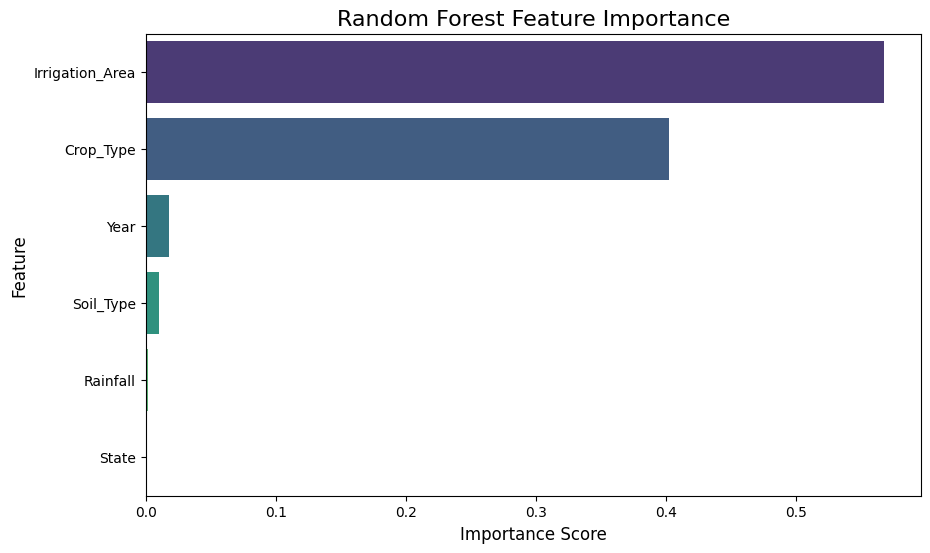

In [30]:
# Assuming final_model is your trained RandomForestRegressor
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with your feature names
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df.head(10), 
    palette='viridis'  # You can use 'purple' or other palettes too
)
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


- Irrigation_Area is the most significant factor, indicating that regions with well-managed irrigation contribute greatly to crop yield.
- Crop_Type_Bajra is the second most important feature, emphasizing that the crop type plays a crucial role in determining yield.

**These findings can guide agricultural strategies to focus on improving irrigation systems and selecting high-yielding crops like Bajra for specific regions to enhance productivity. Other factors like soil type and rainfall contribute marginally but should not be ignored entirely in decision-making**

# **📤 Submission:**

In [31]:
test_data

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,0,2,0.784218,0,0.957448
1,1002,2020,0,2,1.215916,0,0.963387
2,1003,2019,0,1,0.989204,1,0.681450
3,1004,2018,0,1,1.175297,1,0.658569
4,1005,2017,0,1,0.180597,1,0.641762
5,1006,2014,0,0,-0.840553,0,-1.404629
6,1007,2013,0,0,1.377449,0,-1.402867
7,1008,2011,0,0,-2.408646,0,-1.403751


In [52]:
test_transformed=test_data.drop(columns=['id'])
output= pd.DataFrame(test_data['id'])
rf_output = final_model.predict(test_transformed)
output['Crop_Yield (kg/ha)']= rf_output
output.to_csv("/kaggle/working/submission.csv", index = None)
output

,id,Crop_Yield (kg/ha)
0,1001,5032.226986
1,1002,5059.171677
2,1003,4009.524870
3,1004,3986.989096
4,1005,3972.940921
5,1006,485.403587
6,1007,978.763059
7,1008,916.883169


# **🔚 Conclusion:**

**🌾 After RandomizedSearchCV tuning, the crop yield prediction model improved significantly: 📉 MSE dropped from 75653.43 to 43991.71, and 📈 R² increased from 96.94% to 98.60%!**

**🌧️🌱 Key features like rainfall, soil type, and irrigation were better captured, enhancing accuracy and reliability. ✅**

# **🚀 If you found this notebook helpful, insightful, or inspiring, I would truly appreciate your upvote! Your support can help bring this notebook to the spotlight and make it shine in the competition🏆✨

# **Thank you for your time and encouragement! 😊**

